<a href="https://colab.research.google.com/github/jonesarieh/Car-Price-and-Car-Class-Prediction/blob/main/Car_Class_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load csv file into Colab Notebook
df =pd.read_csv("/content/cars_class.csv")

In [4]:
df.shape

(719, 20)

In [5]:
df.head() # Gives first 5 data's

,ID,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,1,88,39,70,166,66,7,148,44,19,134,167,332,143,69,5,13,193,201,0
1,2,85,35,64,129,57,6,116,57,17,125,138,200,123,65,1,23,196,203,3
2,3,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,3
3,4,102,54,98,177,56,10,219,31,25,171,219,706,223,72,5,17,186,196,1
4,5,87,39,74,152,58,6,151,44,19,136,174,337,140,70,1,33,187,196,2


In [6]:
df.isnull().sum() # Check's whether nan is present

ID              0
Comp            0
Circ            0
D.Circ          0
Rad.Ra          0
Pr.Axis.Ra      0
Max.L.Ra        0
Scat.Ra         0
Elong           0
Pr.Axis.Rect    0
Max.L.Rect      0
Sc.Var.Maxis    0
Sc.Var.maxis    0
Ra.Gyr          0
Skew.Maxis      0
Skew.maxis      0
Kurt.maxis      0
Kurt.Maxis      0
Holl.Ra         0
Class           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ID            719 non-null    int64
 1   Comp          719 non-null    int64
 2   Circ          719 non-null    int64
 3   D.Circ        719 non-null    int64
 4   Rad.Ra        719 non-null    int64
 5   Pr.Axis.Ra    719 non-null    int64
 6   Max.L.Ra      719 non-null    int64
 7   Scat.Ra       719 non-null    int64
 8   Elong         719 non-null    int64
 9   Pr.Axis.Rect  719 non-null    int64
 10  Max.L.Rect    719 non-null    int64
 11  Sc.Var.Maxis  719 non-null    int64
 12  Sc.Var.maxis  719 non-null    int64
 13  Ra.Gyr        719 non-null    int64
 14  Skew.Maxis    719 non-null    int64
 15  Skew.maxis    719 non-null    int64
 16  Kurt.maxis    719 non-null    int64
 17  Kurt.Maxis    719 non-null    int64
 18  Holl.Ra       719 non-null    int64
 19  Class         719 non-null   

In [8]:
# Store Column names in separate variable
cols = df.columns.values.tolist()
print(cols)

['ID', 'Comp', 'Circ', 'D.Circ', 'Rad.Ra', 'Pr.Axis.Ra', 'Max.L.Ra', 'Scat.Ra', 'Elong', 'Pr.Axis.Rect', 'Max.L.Rect', 'Sc.Var.Maxis', 'Sc.Var.maxis', 'Ra.Gyr', 'Skew.Maxis', 'Skew.maxis', 'Kurt.maxis', 'Kurt.Maxis', 'Holl.Ra', 'Class']


In [9]:
for each in cols:
  print(each,df[each].unique())

ID [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246

<Axes: >

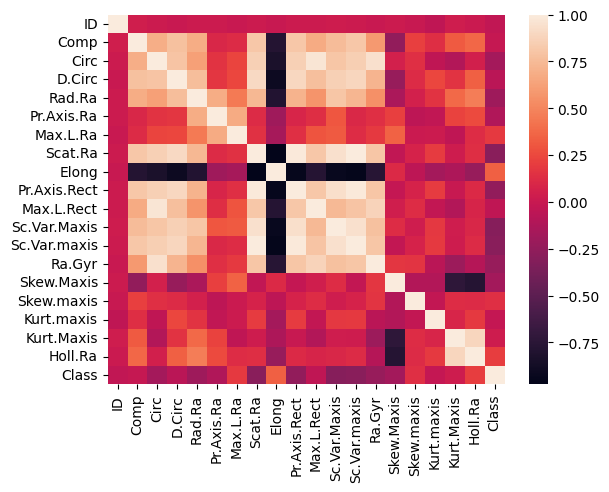

In [10]:
sns.heatmap(df.corr())

In [11]:
df.corr()['Class'].sort_values()

Sc.Var.Maxis   -0.306089
Sc.Var.maxis   -0.289484
Scat.Ra        -0.289056
Pr.Axis.Rect   -0.254703
Ra.Gyr         -0.228605
Rad.Ra         -0.198390
Skew.Maxis     -0.178984
Circ           -0.171417
Pr.Axis.Ra     -0.110222
D.Circ         -0.070422
Max.L.Rect     -0.042996
ID             -0.033656
Kurt.maxis     -0.024255
Comp           -0.015112
Kurt.Maxis      0.028242
Skew.maxis      0.142547
Max.L.Ra        0.190215
Holl.Ra         0.203227
Elong           0.338634
Class           1.000000
Name: Class, dtype: float64

# ***----------Data Preprocessing----------***

<Axes: >

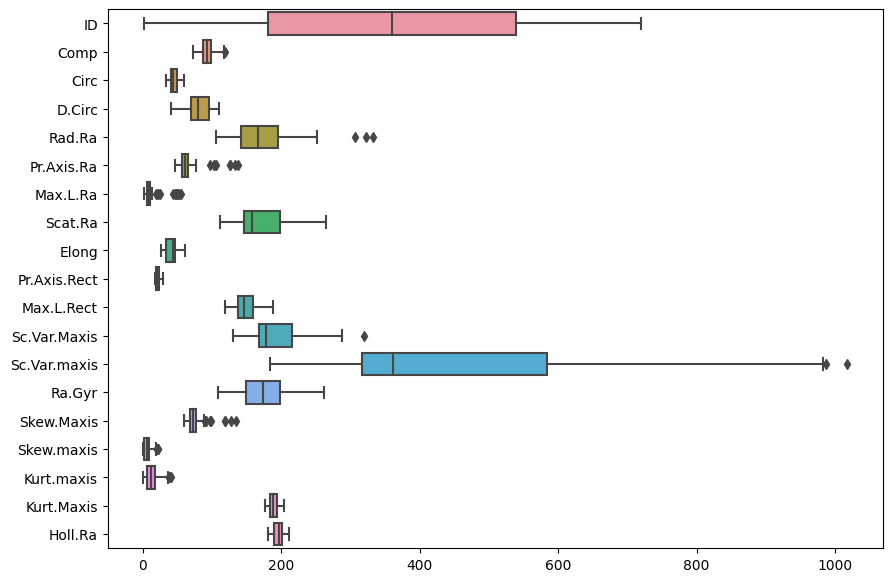

In [13]:
#Before Scaling
plt.figure(figsize=(10,7))
sns.boxplot(data=df.iloc[:,0:-1],orient='h')

# **Scaling**

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
SS = StandardScaler()

In [16]:
df.iloc[:,0:-1] = SS.fit_transform(df.iloc[:,0:-1])

In [17]:
df.mean(axis=0)

ID              0.000000e+00
Comp            4.817658e-16
Circ            4.545892e-16
D.Circ         -4.323539e-17
Rad.Ra         -2.217358e-16
Pr.Axis.Ra      1.568827e-16
Max.L.Ra       -1.828239e-16
Scat.Ra        -1.371179e-16
Elong           1.791180e-17
Pr.Axis.Rect    4.774422e-16
Max.L.Rect     -5.163541e-16
Sc.Var.Maxis   -3.780008e-16
Sc.Var.maxis   -7.658840e-17
Ra.Gyr         -2.853536e-16
Skew.Maxis     -8.597666e-16
Skew.maxis      6.547073e-17
Kurt.maxis     -1.235297e-17
Kurt.Maxis     -1.037649e-16
Holl.Ra         3.915891e-16
Class           1.470097e+00
dtype: float64

In [18]:
df.std(axis=0)

ID              1.000696
Comp            1.000696
Circ            1.000696
D.Circ          1.000696
Rad.Ra          1.000696
Pr.Axis.Ra      1.000696
Max.L.Ra        1.000696
Scat.Ra         1.000696
Elong           1.000696
Pr.Axis.Rect    1.000696
Max.L.Rect      1.000696
Sc.Var.Maxis    1.000696
Sc.Var.maxis    1.000696
Ra.Gyr          1.000696
Skew.Maxis      1.000696
Skew.maxis      1.000696
Kurt.maxis      1.000696
Kurt.Maxis      1.000696
Holl.Ra         1.000696
Class           1.126477
dtype: float64

<Axes: >

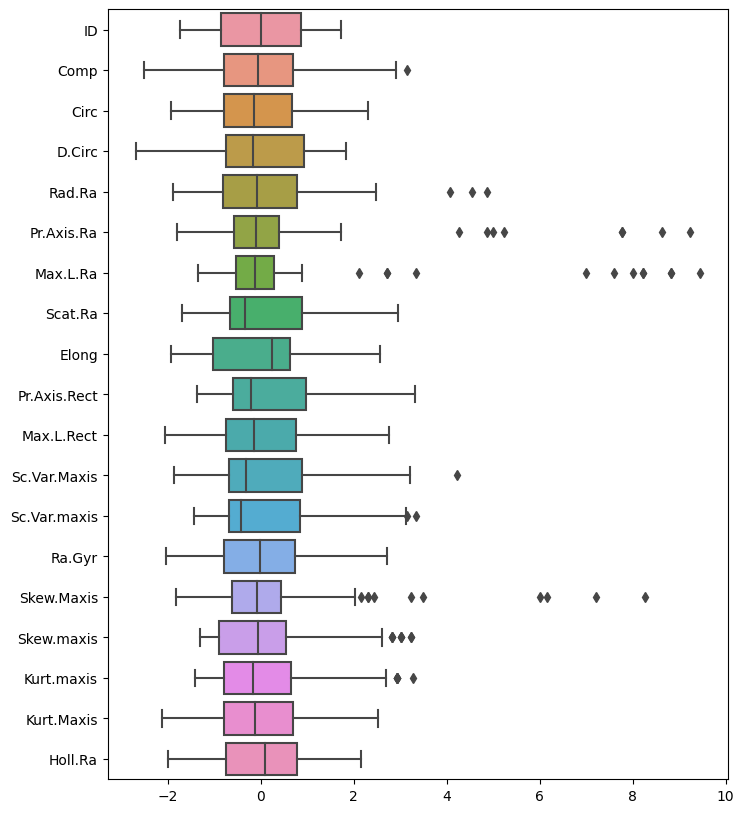

In [20]:
#After Scaling
plt.figure(figsize=(8,10))
sns.boxplot(data=df.iloc[:,0:-1],orient='h')

# **Removing Outliers**

# Comp

In [21]:
Q1 =np.percentile(df['Comp'],25)
Q3 =np.percentile(df['Comp'],75)
IQR= Q3-Q1
max = Q3+ 1.5*IQR
min = Q1- 1.5*IQR

In [22]:
indices = np.where(df['Comp']>=max)

In [23]:
indices

(array([ 74, 490]),)

In [24]:
index_list =[]

In [25]:
for each in range(len(indices[0])):
  index_list.append(indices[0][each])
print(index_list)

[74, 490]


# Rad.Ra

In [26]:
Q1 =np.percentile(df['Rad.Ra'],25)
Q3 =np.percentile(df['Rad.Ra'],75)
IQR= Q3-Q1
max = Q3+ 1.5*IQR
min = Q1- 1.5*IQR

In [27]:
indices = np.where(df['Rad.Ra']>=max)

In [28]:
indices

(array([ 69, 271, 655]),)

In [29]:
for each in range(len(indices[0])):
  index_list.append(indices[0][each])
print(index_list)

[74, 490, 69, 271, 655]


# Pr.Axis.Ra

In [30]:
Q1 =np.percentile(df['Pr.Axis.Ra'],25)
Q3 =np.percentile(df['Pr.Axis.Ra'],75)
IQR= Q3-Q1
max = Q3+ 1.5*IQR
min = Q1- 1.5*IQR

In [31]:
indices = np.where(df['Pr.Axis.Ra']>=max)

In [32]:
indices

(array([ 69, 119, 271, 355, 404, 505, 647, 655]),)

In [33]:
for each in range(len(indices[0])):
  index_list.append(indices[0][each])
print(index_list)

[74, 490, 69, 271, 655, 69, 119, 271, 355, 404, 505, 647, 655]


# Max.L.Ra

In [34]:
Q1 =np.percentile(df['Max.L.Ra'],25)
Q3 =np.percentile(df['Max.L.Ra'],75)
IQR= Q3-Q1
max = Q3+ 1.5*IQR
min = Q1- 1.5*IQR

In [35]:
indices = np.where(df['Max.L.Ra']>=max)

In [36]:
indices

(array([ 69,  97, 119, 271, 355, 376, 404, 505, 647, 655, 673, 682]),)

In [37]:
for each in range(len(indices[0])):
  index_list.append(indices[0][each])
print(index_list)

[74, 490, 69, 271, 655, 69, 119, 271, 355, 404, 505, 647, 655, 69, 97, 119, 271, 355, 376, 404, 505, 647, 655, 673, 682]


# Sc.Var.Maxis

In [38]:
Q1 =np.percentile(df['Sc.Var.Maxis'],25)
Q3 =np.percentile(df['Sc.Var.Maxis'],75)
IQR= Q3-Q1
max = Q3+ 1.5*IQR
min = Q1- 1.5*IQR

In [39]:
indices = np.where(df['Sc.Var.Maxis']>=max)

In [40]:
indices

(array([655]),)

In [41]:
for each in range(len(indices[0])):
  index_list.append(indices[0][each])
print(index_list)

[74, 490, 69, 271, 655, 69, 119, 271, 355, 404, 505, 647, 655, 69, 97, 119, 271, 355, 376, 404, 505, 647, 655, 673, 682, 655]


# Sc.Var.maxis

In [42]:
Q1 =np.percentile(df['Sc.Var.maxis'],25)
Q3 =np.percentile(df['Sc.Var.maxis'],75)
IQR= Q3-Q1
max = Q3+ 1.5*IQR
min = Q1- 1.5*IQR

In [43]:
indices = np.where(df['Sc.Var.maxis']>=max)

In [44]:
indices

(array([364, 714]),)

In [45]:
for each in range(len(indices[0])):
  index_list.append(indices[0][each])
print(index_list)

[74, 490, 69, 271, 655, 69, 119, 271, 355, 404, 505, 647, 655, 69, 97, 119, 271, 355, 376, 404, 505, 647, 655, 673, 682, 655, 364, 714]


# Skew.Maxis

In [46]:
Q1 =np.percentile(df['Skew.Maxis'],25)
Q3 =np.percentile(df['Skew.Maxis'],75)
IQR= Q3-Q1
max = Q3+ 1.5*IQR
min = Q1- 1.5*IQR

In [47]:
indices = np.where(df['Skew.Maxis']>=max)

In [48]:
indices

(array([ 69,  75, 119, 195, 271, 355, 404, 440, 505, 523, 635, 647, 655,
        682]),)

In [49]:
for each in range(len(indices[0])):
  index_list.append(indices[0][each])
print(index_list)

[74, 490, 69, 271, 655, 69, 119, 271, 355, 404, 505, 647, 655, 69, 97, 119, 271, 355, 376, 404, 505, 647, 655, 673, 682, 655, 364, 714, 69, 75, 119, 195, 271, 355, 404, 440, 505, 523, 635, 647, 655, 682]


# Skew.maxis

In [50]:
Q1 =np.percentile(df['Skew.maxis'],25)
Q3 =np.percentile(df['Skew.maxis'],75)
IQR= Q3-Q1
max = Q3+ 1.5*IQR
min = Q1- 1.5*IQR

In [51]:
indices = np.where(df['Skew.maxis']>=max)

In [52]:
indices

(array([ 74, 220, 358, 362, 490, 510, 598, 681]),)

In [53]:
for each in range(len(indices[0])):
  index_list.append(indices[0][each])
print(index_list)

[74, 490, 69, 271, 655, 69, 119, 271, 355, 404, 505, 647, 655, 69, 97, 119, 271, 355, 376, 404, 505, 647, 655, 673, 682, 655, 364, 714, 69, 75, 119, 195, 271, 355, 404, 440, 505, 523, 635, 647, 655, 682, 74, 220, 358, 362, 490, 510, 598, 681]


# Kurt.maxis

In [54]:
Q1 =np.percentile(df['Kurt.maxis'],25)
Q3 =np.percentile(df['Kurt.maxis'],75)
IQR= Q3-Q1
max = Q3+ 1.5*IQR
min = Q1- 1.5*IQR

In [55]:
indices = np.where(df['Kurt.maxis']>=max)

In [56]:
indices

(array([ 89, 226, 470, 488, 510, 600]),)

In [57]:
for each in range(len(indices[0])):
  index_list.append(indices[0][each])
print(index_list)

[74, 490, 69, 271, 655, 69, 119, 271, 355, 404, 505, 647, 655, 69, 97, 119, 271, 355, 376, 404, 505, 647, 655, 673, 682, 655, 364, 714, 69, 75, 119, 195, 271, 355, 404, 440, 505, 523, 635, 647, 655, 682, 74, 220, 358, 362, 490, 510, 598, 681, 89, 226, 470, 488, 510, 600]


**Dropping index**

<Axes: >

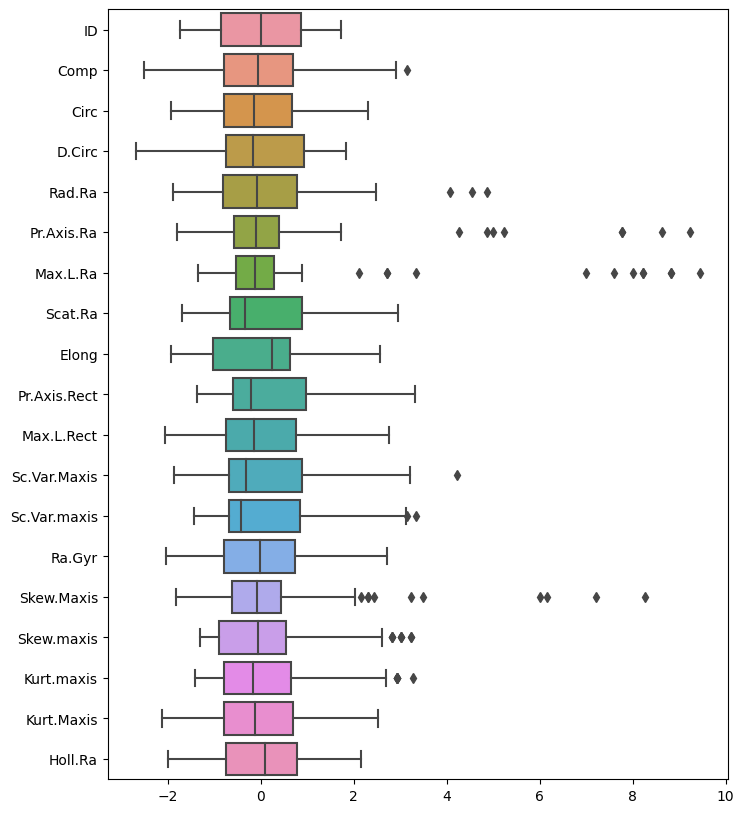

In [58]:
plt.figure(figsize=(8,10))
sns.boxplot(data=df.iloc[:,0:-1],orient='h')

In [59]:
print(index_list)

[74, 490, 69, 271, 655, 69, 119, 271, 355, 404, 505, 647, 655, 69, 97, 119, 271, 355, 376, 404, 505, 647, 655, 673, 682, 655, 364, 714, 69, 75, 119, 195, 271, 355, 404, 440, 505, 523, 635, 647, 655, 682, 74, 220, 358, 362, 490, 510, 598, 681, 89, 226, 470, 488, 510, 600]


In [60]:
index_list = set(index_list)

In [61]:
index_list =list(index_list)

In [62]:
print(index_list)

[647, 523, 655, 271, 404, 673, 681, 682, 440, 195, 69, 74, 714, 75, 598, 470, 600, 89, 220, 97, 226, 355, 358, 488, 490, 362, 364, 119, 376, 505, 635, 510]


In [63]:
len(index_list)

32

In [64]:
df.drop(index_list,inplace=True)

In [65]:
df.shape

(687, 20)

In [66]:
df

,ID,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,-1.729644,-0.670551,-0.952030,-0.755489,-0.076363,0.503186,-0.330899,-0.611815,0.376965,-0.598352,-0.964305,-0.678174,-0.596051,-0.987512,-0.488654,-0.276858,0.069251,0.695144,0.773497,0
1,-1.724826,-1.040658,-1.602859,-1.142151,-1.171502,-0.587275,-0.534421,-1.584026,2.052426,-1.379850,-1.582863,-1.607254,-1.351013,-1.610038,-1.019383,-1.101126,1.213883,1.191478,1.050118,3
2,-1.720008,-0.300444,-0.626615,0.146724,-0.816322,-0.587275,0.076144,-0.581433,0.505847,-0.598352,-0.345746,-0.582062,-0.607490,-0.520618,-0.090608,0.547410,0.183714,0.033365,0.496877,3
3,-1.715190,1.056615,1.488579,1.048937,0.249219,-0.708437,0.279665,1.545277,-1.298496,1.746143,1.578657,0.987763,1.543007,1.502589,-0.090608,-0.276858,0.527104,-0.462969,0.081947,1
4,-1.710372,-0.793920,-0.952030,-0.497714,-0.490740,-0.466113,-0.534421,-0.520670,0.376965,-0.598352,-0.826847,-0.453913,-0.567454,-1.080891,-0.355972,-1.101126,2.358516,-0.297524,0.081947,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,1.705554,1.056615,1.163165,1.048937,1.669940,1.108998,0.279665,1.393370,-1.298496,1.355394,1.097556,1.276098,1.405741,0.755559,-0.223290,-1.307193,0.412641,-0.297524,0.081947,1
715,1.715190,-0.053706,-0.301201,-0.368826,-0.579535,-0.587275,-0.330899,-0.581433,0.376965,-0.598352,-0.345746,-0.517988,-0.578893,0.039655,-0.488654,1.577745,-1.418771,0.033365,-0.194673,2
716,1.720008,-0.423813,-0.463908,-1.206595,-0.727527,-0.344950,-0.330899,-1.128302,1.150255,-0.989101,-0.414475,-1.094658,-1.013568,-0.396113,-1.019383,1.783812,-1.075381,1.356923,1.188428,3
717,1.724826,0.933246,1.813994,1.242268,1.847531,1.230160,0.279665,1.484514,-1.298496,1.355394,1.578657,1.404247,1.497252,1.284705,-0.090608,-0.895059,-0.731992,-0.297524,0.220257,2


<Axes: >

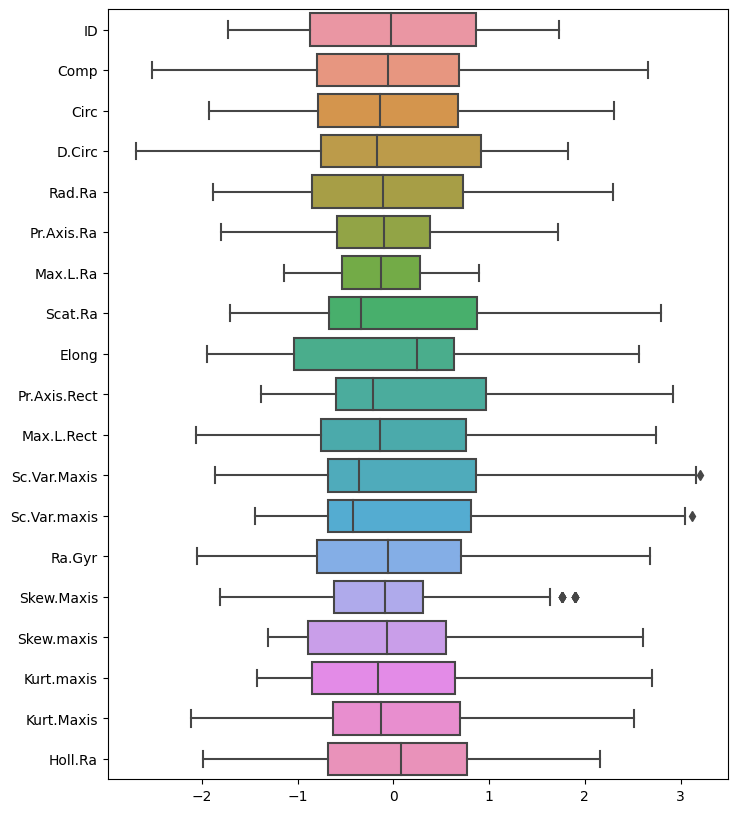

In [67]:
plt.figure(figsize=(8,10))
sns.boxplot(data=df.iloc[:,0:-1],orient='h')

<Axes: >

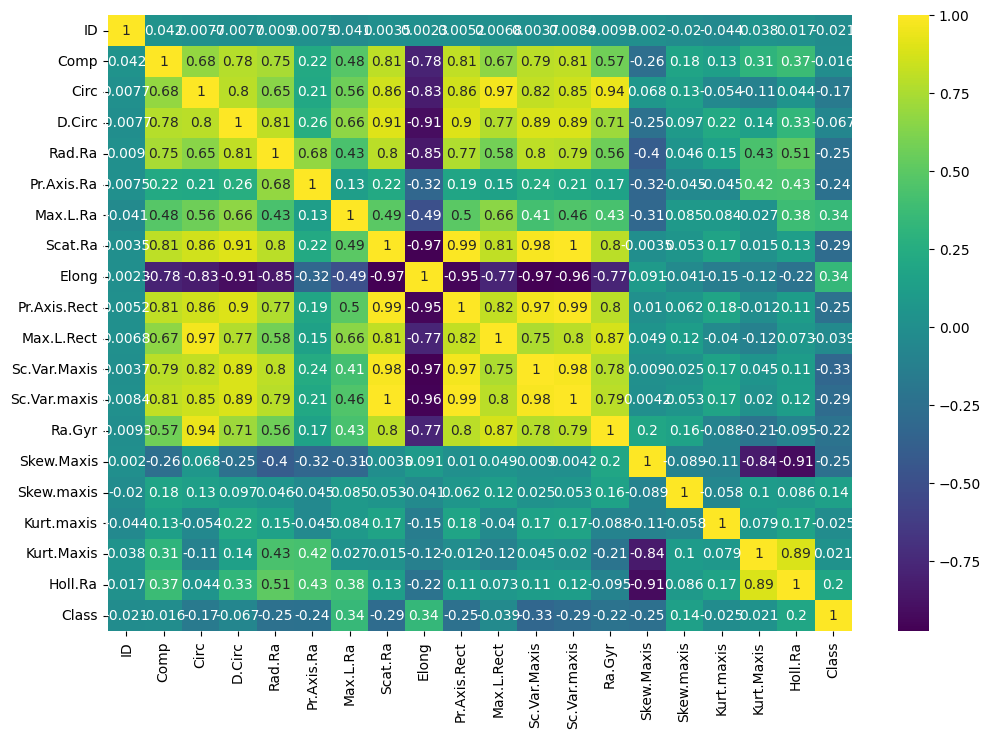

In [68]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

# **Machine Learning**

# **Splitting X and y**

In [69]:
X = df.drop('Class',axis=1)
y = df['Class']

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [72]:
X_train

,ID,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra
345,-0.067451,-0.300444,-1.114737,-0.433270,-0.964314,-1.071924,-0.534421,-0.733341,0.763610,-0.598352,-1.170491,-0.742248,-0.750475,-0.800755,-0.488654,-1.101126,-0.617528,-0.462969,-0.609603
418,0.284259,-1.410765,-0.301201,-0.562158,-0.431543,0.382024,-0.330899,-0.520670,0.376965,-0.598352,-0.345746,-0.325764,-0.544577,-0.458366,0.440121,-0.276858,-0.159675,-0.628414,-0.886223
136,-1.074403,1.303353,1.163165,0.791161,1.166768,0.503186,-0.737942,1.211080,-1.298496,1.355394,0.891370,1.244061,1.314231,1.346958,0.440121,0.959544,-0.960918,0.695144,-0.609603
126,-1.122582,-0.793920,0.024214,0.017836,-0.135560,-0.223788,-0.127378,-0.368762,0.119202,-0.598352,-0.277018,-0.229652,-0.401592,-0.022598,-0.355972,-0.895059,-1.189845,0.198810,0.081947
331,-0.134903,-0.793920,-0.626615,-0.562158,-0.313150,0.260861,-0.330899,-0.520670,0.376965,-0.598352,-0.689390,-0.421876,-0.544577,-0.707376,0.042074,-0.688992,-0.503065,0.198810,-0.194673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,0.953954,0.563139,1.000457,0.920049,1.018776,0.503186,0.279665,0.603448,-0.782969,0.573896,0.616455,0.603316,0.553550,1.751599,-0.621336,0.753477,-1.304308,0.364255,0.496877
609,1.204487,0.809877,1.000457,1.757818,1.640342,0.624348,0.076144,1.484514,-1.427377,1.355394,0.960099,1.596471,1.531568,0.973443,-0.090608,-0.070791,0.641567,0.033365,0.496877
515,0.751600,-0.177075,-0.463908,-0.819933,-0.461142,-0.466113,-0.127378,-0.854868,0.892492,-0.989101,-0.689390,-0.742248,-0.836267,-0.738502,-1.152065,0.753477,0.984957,1.687812,1.465048
550,0.920228,-0.053706,-1.602859,-0.626601,0.101227,0.018537,-0.330899,-0.581433,0.376965,-0.598352,-1.651592,-0.614099,-0.584613,-1.547785,-1.417429,-0.276858,2.015126,2.349591,2.018288


In [73]:
y_train

345    2
418    0
136    0
126    1
331    0
      ..
557    2
609    1
515    1
550    1
174    1
Name: Class, Length: 549, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

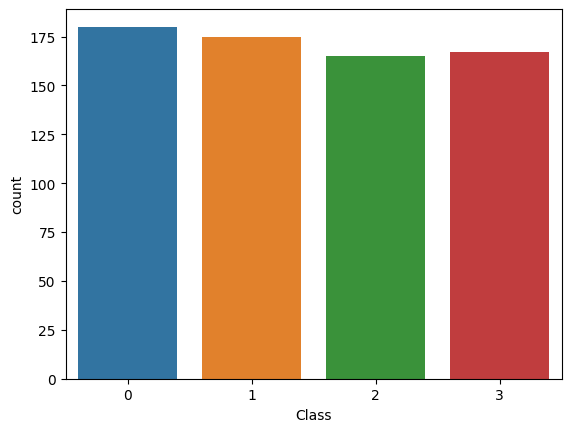

In [74]:
sns.countplot(data=df,x='Class')

# ***--------------Model Selection------------***

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import ConfusionMatrixDisplay

Logistic Regression

In [76]:
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train,y_train)
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(log_model.score(X_test,y_test))

[[31  0  2  0]
 [ 1 18  9  1]
 [ 3  9 21  1]
 [ 0  0  0 42]]
0.8115942028985508


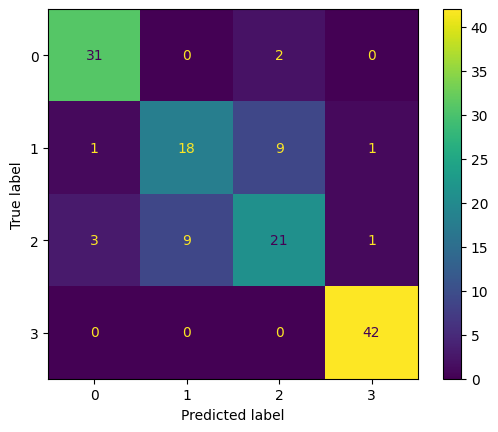

In [77]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [78]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        33
           1       0.67      0.62      0.64        29
           2       0.66      0.62      0.64        34
           3       0.95      1.00      0.98        42

    accuracy                           0.81       138
   macro avg       0.79      0.79      0.79       138
weighted avg       0.80      0.81      0.81       138



 KNN-Classifier

In [79]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(knn_model.score(X_test,y_test))

[[33  0  0  0]
 [ 1 16 10  2]
 [ 3 14 15  2]
 [ 4  1  0 37]]
0.7318840579710145


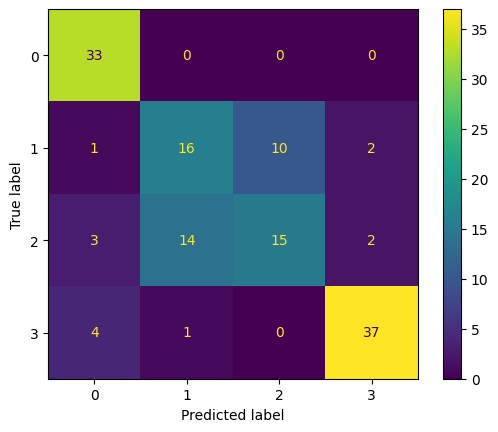

In [80]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        33
           1       0.52      0.55      0.53        29
           2       0.60      0.44      0.51        34
           3       0.90      0.88      0.89        42

    accuracy                           0.73       138
   macro avg       0.71      0.72      0.71       138
weighted avg       0.72      0.73      0.72       138



Decision Tree Classifier

In [82]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(dtc.score(X_test,y_test))

[[31  1  1  0]
 [ 0 19  9  1]
 [ 0 19 14  1]
 [ 0  1  2 39]]
0.7463768115942029


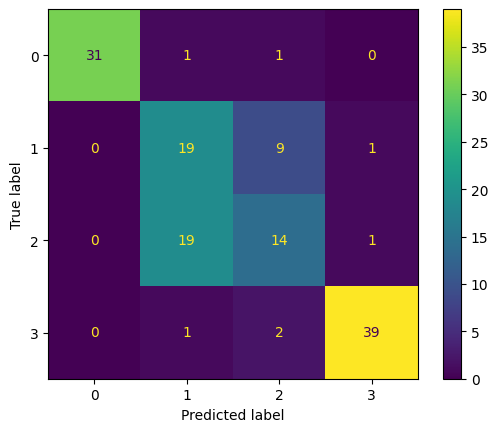

In [83]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [84]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.47      0.66      0.55        29
           2       0.54      0.41      0.47        34
           3       0.95      0.93      0.94        42

    accuracy                           0.75       138
   macro avg       0.74      0.73      0.73       138
weighted avg       0.76      0.75      0.75       138



RandomForestClassifier

In [85]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(rfc.score(X_test,y_test))

[[33  0  0  0]
 [ 0 16 12  1]
 [ 0 13 20  1]
 [ 0  0  0 42]]
0.8043478260869565


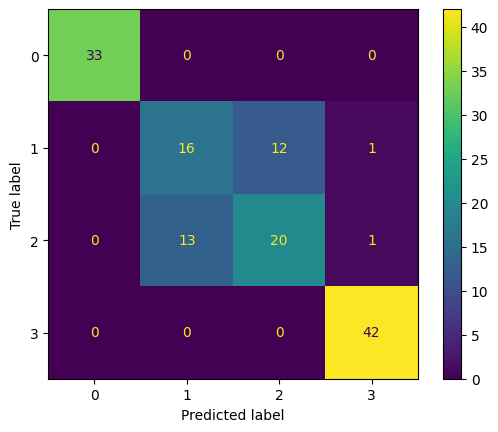

In [86]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.55      0.55      0.55        29
           2       0.62      0.59      0.61        34
           3       0.95      1.00      0.98        42

    accuracy                           0.80       138
   macro avg       0.78      0.78      0.78       138
weighted avg       0.80      0.80      0.80       138



Gradient Boosting Classifier

In [88]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred = gbc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(gbc.score(X_test,y_test))

[[33  0  0  0]
 [ 0 15 13  1]
 [ 0 12 21  1]
 [ 0  0  1 41]]
0.7971014492753623


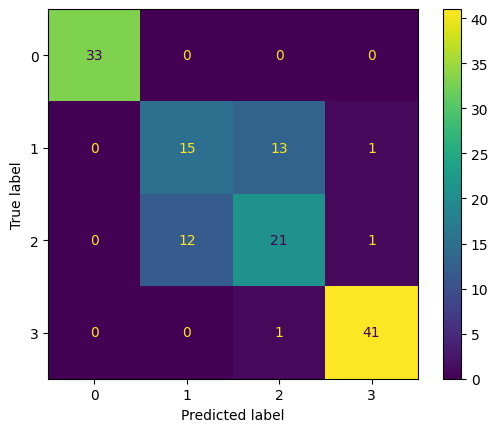

In [89]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.56      0.52      0.54        29
           2       0.60      0.62      0.61        34
           3       0.95      0.98      0.96        42

    accuracy                           0.80       138
   macro avg       0.78      0.78      0.78       138
weighted avg       0.79      0.80      0.80       138




### 1.Logistic Regression  
### 2.Gradient Boosting  
### 3.Random Forest



# ***-------------Model Training----------------***

# **Tuning HyperParameters**

**1.Logistic Regression**

In [91]:
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train,y_train)
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[31  0  2  0]
 [ 1 18  9  1]
 [ 3  9 21  1]
 [ 0  0  0 42]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        33
           1       0.67      0.62      0.64        29
           2       0.66      0.62      0.64        34
           3       0.95      1.00      0.98        42

    accuracy                           0.81       138
   macro avg       0.79      0.79      0.79       138
weighted avg       0.80      0.81      0.81       138



In [92]:
df['Class'].value_counts()

0    180
1    175
3    167
2    165
Name: Class, dtype: int64

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
param_grid = {"C":[0.1,0.2,0.3,0.5,0.7,1,1.5,2],"max_iter":[200,500]}

In [95]:
logcv_model = LogisticRegression()

In [96]:
grid = GridSearchCV(logcv_model,param_grid,cv=10)

In [97]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.2, 0.3, 0.5, 0.7, 1, 1.5, 2],
                         'max_iter': [200, 500]})

In [98]:
grid.best_params_

{'C': 2, 'max_iter': 200}

In [99]:
log_model = LogisticRegression(C=2,max_iter=200)
log_model.fit(X_train,y_train)
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[31  0  2  0]
 [ 1 17 10  1]
 [ 2  9 23  0]
 [ 0  1  0 41]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        33
           1       0.63      0.59      0.61        29
           2       0.66      0.68      0.67        34
           3       0.98      0.98      0.98        42

    accuracy                           0.81       138
   macro avg       0.79      0.79      0.79       138
weighted avg       0.81      0.81      0.81       138



In [100]:
log_model.get_params()

{'C': 2,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 200,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [101]:
log_model.coef_

array([[ 2.26878902e-03, -7.45136874e-01,  2.38363317e-01,
        -1.59913156e+00, -3.68153542e+00,  3.10708347e+00,
        -1.52180926e+00,  5.20378958e-01, -2.11320701e+00,
         1.45627024e-01, -1.50512785e-01,  1.92873949e+00,
         5.13298253e-01,  5.18701472e-01,  1.38371795e+00,
        -6.65241569e-01,  1.42611930e-01,  3.38952629e+00,
        -1.91458425e+00],
       [ 1.19711009e-01, -1.00006669e+00,  1.36339233e+00,
         1.19950527e-01,  2.37056219e+00, -1.92038661e+00,
        -2.07959469e-01,  9.54688355e-01,  3.27552576e-01,
         3.12295711e-01, -1.70830190e+00, -9.18940334e-01,
         1.09887708e+00, -2.70766855e-01, -1.34653618e+00,
         2.39226992e-01,  2.33921336e-01, -3.26476774e-01,
        -7.95298284e-01],
       [ 7.65582407e-02,  4.45498820e-01, -1.50266309e+00,
         4.03889715e-02,  2.90894578e+00, -1.91941515e+00,
        -9.62402714e-01,  1.61342993e-01, -1.62156910e-02,
         1.00260394e+00, -1.29742582e+00, -4.17752739e-01,
    

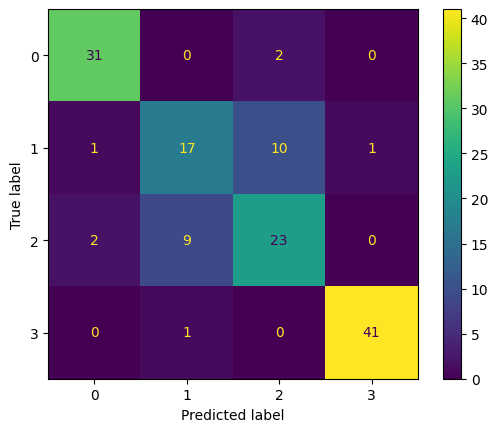

In [102]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

**2.Gradient Boosting**

In [103]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred = gbc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(gbc.score(X_test,y_test))

[[33  0  0  0]
 [ 0 15 13  1]
 [ 0 12 21  1]
 [ 0  0  1 41]]
0.7971014492753623


In [104]:
from sklearn.model_selection import GridSearchCV

In [105]:
param_grid = {"n_estimators":[1,5,10,20,40,100],'max_depth':[3,4,5,6]}

In [106]:
gb_model = GradientBoostingClassifier()

In [107]:
grid = GridSearchCV(gb_model,param_grid)

In [108]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [109]:
grid.best_params_

{'max_depth': 6, 'n_estimators': 40}

In [110]:
gbc = GradientBoostingClassifier(n_estimators=40,max_depth=6)
gbc.fit(X_train,y_train)
y_pred = gbc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(gbc.score(X_test,y_test))

[[33  0  0  0]
 [ 0 12 16  1]
 [ 0 10 24  0]
 [ 0  0  0 42]]
0.8043478260869565


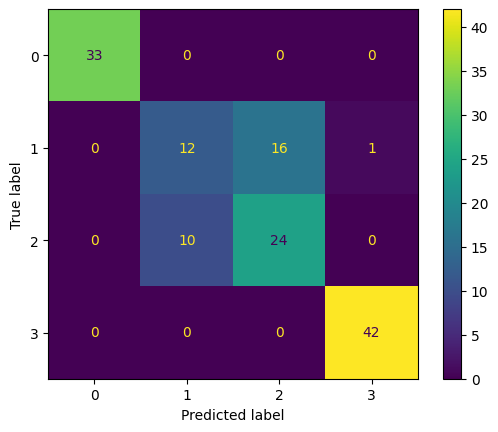

In [111]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

**3.Random Forest**

In [112]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(rfc.score(X_test,y_test))

[[33  0  0  0]
 [ 0 16 12  1]
 [ 0 15 18  1]
 [ 0  0  1 41]]
0.782608695652174


In [113]:
from sklearn.model_selection import GridSearchCV

In [114]:
param_grid = {"n_estimators":[1,5,10,20,40,100,200,500],'max_depth':[3,4,5,6]}

In [115]:
rf_model = RandomForestClassifier()

In [116]:
grid = GridSearchCV(rf_model,param_grid)

In [117]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100, 200, 500]})

In [118]:
grid.best_params_

{'max_depth': 6, 'n_estimators': 40}

In [119]:
rfc = RandomForestClassifier(n_estimators=40,max_depth=6)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(rfc.score(X_test,y_test))

[[33  0  0  0]
 [ 0 18 10  1]
 [ 1 16 15  2]
 [ 0  0  1 41]]
0.7753623188405797


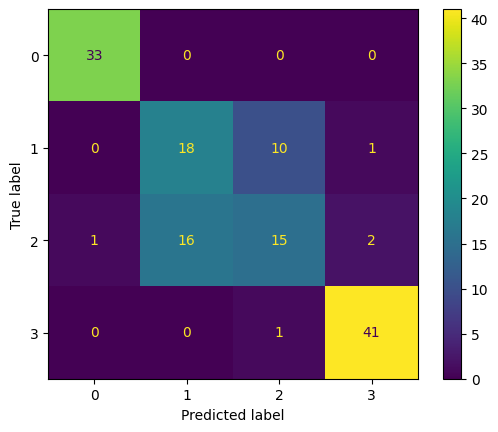

In [120]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# ***-------------Model Evaluating-------------***

In [121]:
log_model = LogisticRegression(C=2,max_iter=200)
log_model.fit(X_train,y_train)
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[31  0  2  0]
 [ 1 17 10  1]
 [ 2  9 23  0]
 [ 0  1  0 41]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        33
           1       0.63      0.59      0.61        29
           2       0.66      0.68      0.67        34
           3       0.98      0.98      0.98        42

    accuracy                           0.81       138
   macro avg       0.79      0.79      0.79       138
weighted avg       0.81      0.81      0.81       138



# **Final Model**

In [122]:
final_model = LogisticRegression(C=2,max_iter=200)
final_model.fit(X,y)

LogisticRegression(C=2, max_iter=200)

In [123]:
final_model.score(X,y)

0.8238719068413392

In [124]:
y_hat = final_model.predict(X)

# **Predict New Data of Car Class Prediction**

In [125]:
new_data=df.iloc[0].tolist()

In [126]:
print(new_data)

[-1.729643508549281, -0.6705509026478588, -0.9520298547765454, -0.7554888346969179, -0.07636295291614327, 0.5031859542867159, -0.3308992136056156, -0.6118149227844144, 0.37696530363209557, -0.5983515385935745, -0.9643047128051814, -0.6781737572338329, -0.5960514343207118, -0.9875122957740624, -0.48865419599063503, -0.27685773440059364, 0.06925105252900438, 0.6951439971808756, 0.7734974519071076, 0.0]


In [127]:
new_car_details = new_data[0:-1]
Class_before_prediction = new_data[-1]
print('car_details:',new_car_details)
print('Actual_Class:',Class_before_prediction)

car_details: [-1.729643508549281, -0.6705509026478588, -0.9520298547765454, -0.7554888346969179, -0.07636295291614327, 0.5031859542867159, -0.3308992136056156, -0.6118149227844144, 0.37696530363209557, -0.5983515385935745, -0.9643047128051814, -0.6781737572338329, -0.5960514343207118, -0.9875122957740624, -0.48865419599063503, -0.27685773440059364, 0.06925105252900438, 0.6951439971808756, 0.7734974519071076]
Actual_Class: 0.0


In [128]:
predicted_Class=final_model.predict([new_car_details])
print('Predicted_Class',predicted_Class[0])

Predicted_Class 0


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# **Actual Class: 0**
# **Predicted Class: 0**